# TITANIC SURVIVOR ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
 
%matplotlib inline

# `READING DATA USING LIBRARIES`

We use pandas read_csv function for reading the csv file in python & pandas DataFrame to convert the file into data frame.

In [ ]:
Df=pd.DataFrame(pd.read_csv('/content/train (1).csv'))
Df.shape

(891, 12)

Through this we get the no. of rows and columns in the file

We use this function to view the file data from the top.

In [ ]:
Df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To view the data from bottom use .tail() function

In [ ]:
Df.tail(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.500,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


As the datasheet may have some missing values, we cannot leave them as it is.
Following fxn tells whether they have a null value or not.


In [ ]:
Df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
Df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now this is a significant missing values.So to take all that out of the dataset so I have the appropriate dataset to analyse,i will remove the values which has more than 35% missing values.

In [ ]:
x=Df.isnull().sum()
drop_col=x[x>(35/100*Df.shape[0])]
drop_col

Cabin    687
dtype: int64

In [ ]:
drop_col.index

Index(['Cabin'], dtype='object')

In [ ]:
Df.drop(drop_col.index,axis=1,inplace=True)
Df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

All columns could not be droped because they consist of less missing vaue,they contain data which is helpful for analysis while cabin had more than 35% of missing values and therefore wasn't useful for us.

From the above output we saw we still have two areas where we have the null values.We will fill that data with a mean value

In [ ]:
Df.fillna(Df.mean(),inplace=True)
Df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Now the age column has no missing values but embarked column still has missing value because it consist of string and we can't have the mean of the string.

In [ ]:
Df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
Df['Embarked'].fillna('S',inplace=True) 
Df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now the embarked col too has no null values

In [ ]:
Df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


The above o/p shows the corelation between the columns
as 
-  higher the passenger class,higher the fare
- diagonal elements have 1 as corelation is between the column itself

In [ ]:
Df['FamilySize']=Df['SibSp']+Df['Parch']
Df.drop(['SibSp','Parch'],axis=1,inplace=True)
Df.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


Here I have merged 2 columns i.e no. of siblings and no. of parents abroad to get a new column i.e Family size
We can conclude that:

-survival rate is higher for higher Pclass
 
 -family size has no relation with the survival rate

Now we are checking the survival rate depending upon whether he/she is alone.

In [ ]:
Df['Alone']=[0 if Df['FamilySize'][i]>0 else 1 for i in Df.index]
Df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,0,1
5,6,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,Q,0,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f43b3f2b650>,
      dtype=object)

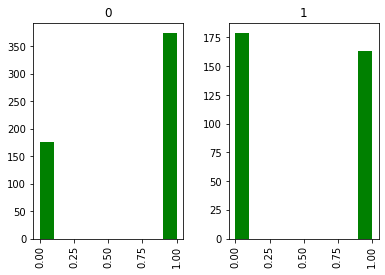

In [ ]:
Df.hist(column="Alone",by="Survived",color="g")

In [ ]:
Df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

From above we can conclude that if the person was alone he/she had less chance of living as there are chances that the person who was travelling with his family might have been rich and prioritized over other.

We can also find the relation between the fare and who are alone.

The below table shoows that if the person is not alone then the chance of ticket price bieng higher is high.

In [ ]:
Df[['Alone','Fare']].corr()

,Alone,Fare
Alone,1.000000,-0.271832
Fare,-0.271832,1.000000


following is the relation of survived with embarked

In [ ]:
Df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64